In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import skimage
from skimage.transform import resize
import tensorflow as tf
from tensorflow import keras
import os

In [39]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 1)
num_classes = 29

train_len = 87000
train_dir = 'C:\\Users\\shala\\Downloads\\asl recognistion\\asl_alphabet_train\\asl_alphabet_train\\'

def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 1), dtype=np.float32)
    y = np.empty((train_len,), dtype=int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 1))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 1))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)
print("Images successfully imported...")

Images successfully imported...


In [40]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)

The shape of X_train is :  (87000, 64, 64, 1)
The shape of y_train is :  (87000,)


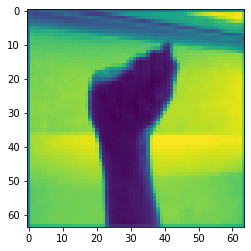

In [41]:
plt.imshow(X_train[0])
plt.show()

In [42]:
X_data = X_train
y_data = y_train

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)


In [44]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

In [45]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
print("Packages imported...")

Packages imported...


In [51]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 60, 60, 32)        832       
                                                                 
 activation_6 (Activation)   (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_7 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                 

In [52]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [53]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
model.fit(X_train, y_cat_train,
          epochs=50,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/50
952/952 - 104s - loss: 1.1536 - accuracy: 0.6568 - val_loss: 0.3679 - val_accuracy: 0.8817 - 104s/epoch - 110ms/step
Epoch 2/50
952/952 - 105s - loss: 0.2026 - accuracy: 0.9345 - val_loss: 0.2174 - val_accuracy: 0.9290 - 105s/epoch - 110ms/step
Epoch 3/50
952/952 - 100s - loss: 0.0947 - accuracy: 0.9712 - val_loss: 0.0625 - val_accuracy: 0.9809 - 100s/epoch - 105ms/step
Epoch 4/50
952/952 - 100s - loss: 0.0620 - accuracy: 0.9807 - val_loss: 0.0776 - val_accuracy: 0.9754 - 100s/epoch - 105ms/step
Epoch 5/50
952/952 - 99s - loss: 0.0520 - accuracy: 0.9844 - val_loss: 0.0427 - val_accuracy: 0.9847 - 99s/epoch - 104ms/step
Epoch 6/50
952/952 - 101s - loss: 0.0410 - accuracy: 0.9877 - val_loss: 0.0384 - val_accuracy: 0.9882 - 101s/epoch - 107ms/step
Epoch 7/50
952/952 - 99s - loss: 0.0389 - accuracy: 0.9893 - val_loss: 0.0485 - val_accuracy: 0.9851 - 99s/epoch - 105ms/step
Epoch 8/50
952/952 - 100s - loss: 0.0332 - accuracy: 0.9903 - val_loss: 0.0547 - val_accuracy: 0.9847 - 100s

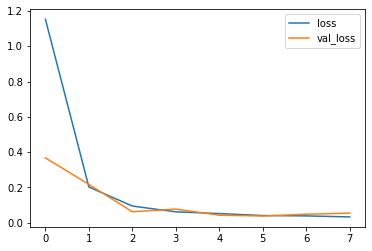

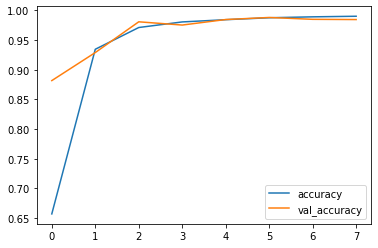

In [55]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()
plt.show()
metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [57]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.05474954843521118, 0.984674334526062]

In [58]:
predictions = model.predictions = np.argmax(model.predict(X_test),axis=1)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))


816/816 [==============================] - 10s 13ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       900
           1       0.96      0.98      0.97       900
           2       1.00      0.99      0.99       900
           3       0.99      0.99      0.99       900
           4       1.00      0.93      0.96       900
           5       0.99      1.00      1.00       900
           6       0.98      0.98      0.98       900
           7       0.98      1.00      0.99       900
           8       0.97      1.00      0.98       900
           9       1.00      0.97      0.98       900
          10       1.00      0.99      0.99       900
          11       1.00      0.97      0.99       900
          12       0.99      0.94      0.97       900
          13       0.95      1.00      0.97       900
          14       1.00      0.98      0.99       900
          15       1.00      0.97      0.99       900
          16       0.97 

In [60]:
from keras.models import load_model
model.save('asl_update.h5')
print("Model saved successfully...")

Model saved successfully...
